# LSST Solar System Simulations, DP 0.3 (August 2023)

Juric, Eggl, Jones, Fedorets, Cornwall, Berres, Chernyavskaya, Moeyens, Schwamb, et many many al.

As well as Bob Abel, Douglas Tucker, and Melissa Graham.

This notebook illustrates what is available in the August 2023 version of the simulated LSST Solar System dataset (the DP0.3 dataset).

## Getting this notebook

This notebook is available from https://github.com/lsst-sssc/lsst-simulation. Open a terminal and clone it into your home directory to run it:
```
    git clone https://github.com/lsst-sssc/lsst-simulation
```

## Connect to the RSP database with DP0.3 products

In [1]:
from lsst.rsp import get_tap_service, retrieve_query

service = get_tap_service("ssotap")

Let's find out what "schemas" are available. These are (very roughly) equivalent to different data releases:

In [2]:
query = "SELECT * FROM tap_schema.schemas"
results = service.search(query).to_table()
results

description,schema_index,schema_name,utype
str512,int32,str64,str512
Data Preview 0.3 contains the catalog products of a Solar System Science Collaboration simulation of the results of SSO analysis of the wide-fast-deep data from the LSST ten-year dataset.,0,dp03_catalogs_10yr,
Data Preview 0.3 contains the catalog products of a Solar System Science Collaboration simulation of the results of SSO analysis of the wide-fast-deep data. This set of tables is from analyzing only the first year of LSST observations.,1,dp03_catalogs_1yr,
A TAP-standard-mandated schema to describe tablesets in a TAP 1.1 service,100000,tap_schema,
UWS Metadata,120000,uws,


The two `dp03_catalogs_*` schemas are our data products. The first one is a simulation of the LSST catalog at the end of the 10yr survey, while the second one is what it will look like at the end of year 1.

For this tutorial, let's focus on the 10yr catalog, and see which tables are available:

In [3]:
query = """
    SELECT
        table_name, description
    FROM
        tap_schema.tables 
    WHERE
        tap_schema.tables.schema_name = 'dp03_catalogs_10yr'
    ORDER BY
        table_index ASC
"""
results = service.search(query).to_table()
results

table_name,description
str64,str512
dp03_catalogs_10yr.DiaSource,Table to store 'difference image sources'; - sources detected at SNR >=5 on difference images.
dp03_catalogs_10yr.MPCORB,The orbit catalog produced by the Minor Planet Center. Ingested daily. O(10M) rows by survey end. The columns are described at https://minorplanetcenter.net//iau/info/MPOrbitFormat.html
dp03_catalogs_10yr.SSObject,"LSST-computed per-object quantities. 1:1 relationship with MPCORB. Recomputed daily, upon MPCORB ingestion."
dp03_catalogs_10yr.SSSource,"LSST-computed per-source quantities. 1:1 relationship with DIASource. Recomputed daily, upon MPCORB ingestion."


There are four tables for the 1-year and 10-year simulation: 
`MPCORB`, `SSObject`, `SSSource`, and `DiaSource`.

Find descriptions of the tables and their schema, plus
information and advice about accessing and querying the DP0.3 tables
(including which columns are <a href="https://dp0-3.lsst.io/data-products-dp0-3/table-access-and-queries.html#unpopulated-columns">currently unpopulated</a>),
in the <a href="https://dp0-3.lsst.io/data-products-dp0-3/index.html#dp0-3-data-products-definition-document-dpdd">DP0.3 data products definitions documentation </a>.

Let's run a simple query to demonstrate that the service works:

In [4]:
results = service.search("SELECT COUNT(*) from dp03_catalogs_10yr.SSObject")
results.to_table().to_pandas()

,COUNT
0,4443479


In [13]:
results = service.search("SELECT COUNT(*) from dp03_catalogs_10yr.SSSource")
results.to_table().to_pandas()

,COUNT
0,653005444


You'll notice lots of boilerplate in the calls above (e.g., `result.to_table()` calls, etc.). I like to wrap all these into one simple function that I'll call `query`. I also prefer to work with Pandas dataframes, so I'll add a `.to_pandas()` to the call.

The function is as follows:

In [5]:
def query(adql, con=None):
    if con is None:
        con = service # assumes there's a global variable named 'service'
    return con.search(adql).to_table().to_pandas()

## Connecting and inspecting other available tables

Let's get a feel for the available data, by grabbing the top 5 rows of each table:

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [8]:
query("SELECT * FROM dp03_catalogs_10yr.DiaSource LIMIT 5")

,band,ccdVisitId,dec,decErr,decTrue,diaObjectId,diaSourceId,mag,magErr,magTrueVband,midPointMjdTai,nameTrue,ra,ra_dec_Cov,raErr,raTrue,snr,ssObjectId,ssObjectReassocTime
0,r,1773083,-25.148514,0.000004,-25.148505,-5963089413928587009,7233165413851974877,21.775999,0.035,21.717686,63325.40325,S100221va,219.328909,0.0,0.000004,219.328911,26.315258,8511195752057871498,63325.40325
1,i,152220,-30.001494,0.000003,-30.001498,-4359078707205250455,7296054571907235670,21.363001,0.024,21.526724,60433.33447,S100221va,245.375915,0.0,0.000003,245.375914,38.376419,8511195752057871498,60433.33447
2,z,958378,-28.219671,0.000005,-28.219671,-3431848165520931762,7573713288484829773,21.721001,0.070,21.859314,61869.22287,S100221va,233.416314,0.0,0.000005,233.416307,13.157629,8511195752057871498,61869.22287
3,i,393343,13.582624,0.000004,13.582626,-4622457964800077411,7700343048688117905,21.676001,0.047,21.878004,60930.23219,S100221va,10.086243,0.0,0.000004,10.086238,19.596468,8511195752057871498,60930.23219
4,z,1238522,7.048425,0.000014,7.048462,4570059734408245107,7794214902204121276,21.284000,0.102,21.518772,62407.29380,S100221va,354.922215,0.0,0.000014,354.922211,9.029745,8511195752057871498,62407.2938


In [9]:
query("SELECT * FROM dp03_catalogs_10yr.SSSource LIMIT 5")

,diaSourceId,eclipticBeta,eclipticLambda,galacticB,galacticL,heliocentricDist,heliocentricVX,heliocentricVY,heliocentricVZ,heliocentricX,heliocentricY,heliocentricZ,mpcUniqueId,phaseAngle,predictedDecErr,predictedMagnitude,predictedMagnitudeErr,predictedRaDecCov,predictedRaErr,residualDec,residualRa,ssObjectId,topocentricDist,topocentricVX,topocentricVY,topocentricVZ,topocentricX,topocentricY,topocentricZ
0,7704797027111923314,-7.363288,259.577541,5.295874,354.762142,3.099653,0.008660,-0.004613,-0.001038,-1.397213,-2.394500,-1.386367,0,16.476927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3099251536154607,2.493116,0.003264,0.010392,0.005479,-0.447297,-2.104000,-1.260451
1,7862835540864346063,-10.858374,222.376285,32.417035,327.991183,3.089192,0.006681,-0.006883,-0.002447,-2.230145,-1.770746,-1.197504,0,3.638725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3099251536154607,2.093446,-0.005465,0.004380,0.002406,-1.518811,-1.114497,-0.913030
2,7877011484513595521,9.620049,345.710213,-48.230500,74.920681,3.246733,0.000531,0.008394,0.004236,3.217072,-0.314052,0.305121,0,11.466073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3099251536154607,2.422965,0.008085,-0.006070,-0.001935,2.314979,-0.702050,0.136952
3,8024534361987717455,-8.164854,216.712205,38.178600,325.178518,3.094557,0.007872,-0.005727,-0.001704,-1.800846,-2.142675,-1.319917,0,17.340574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3099251536154607,2.526007,-0.008927,-0.008743,-0.003049,-2.004443,-1.228686,-0.923714
4,8044659189951738209,-6.523762,252.342320,11.849034,351.669282,3.094291,0.007876,-0.005724,-0.001701,-1.803631,-2.140466,-1.319075,0,18.154686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3099251536154607,3.157652,0.016765,0.008141,0.004222,-0.951606,-2.600014,-1.518268


In [10]:
query("SELECT * FROM dp03_catalogs_10yr.SSObject LIMIT 5")

,arc,discoverySubmissionDate,firstObservationDate,flags,g_Chi2,g_G12,g_G12Err,g_H,g_H_gG12_Cov,g_HErr,g_Ndata,i_Chi2,i_G12,i_G12Err,i_H,i_H_iG12_Cov,i_HErr,i_Ndata,maxExtendedness,medianExtendedness,minExtendedness,MOID,MOIDDeltaV,MOIDEclipticLongitude,MOIDTrueAnomaly,numObs,r_Chi2,r_G12,r_G12Err,r_H,r_H_rG12_Cov,r_HErr,r_Ndata,ssObjectId,u_Chi2,u_G12,u_G12Err,u_H,u_H_uG12_Cov,u_HErr,u_Ndata,y_Chi2,y_G12,y_G12Err,y_H,y_H_yG12_Cov,y_HErr,y_Ndata,z_Chi2,z_G12,z_G12Err,z_H,z_H_zG12_Cov,z_HErr,z_Ndata
0,2743.640869,61069.0,61081.33903,66,1.452662,0.615522,0.098302,19.609064,0.001494,0.017851,29,0.910638,0.511137,0.044249,18.725157,0.000237,0.007771,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292,1.091330,0.457492,0.035494,18.929785,0.000179,0.006722,99,2150553186630,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.006678,0.555756,0.092330,18.784210,0.001015,0.015886,62
1,3608.906494,60222.0,60230.19715,66,1.481137,0.729043,0.183633,21.121069,0.002005,0.033933,9,0.664985,0.611849,0.173546,20.255009,0.000746,0.020321,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,1.580575,0.375160,0.100927,20.433422,0.000503,0.017262,34,3369984299447,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.660381,0.536995,0.374103,20.243176,-0.001520,0.037589,10
2,2766.826904,60967.0,60972.25848,98,0.935651,0.777883,0.666359,19.888412,0.080369,0.130168,9,0.642266,0.407395,0.362802,19.001997,0.014024,0.052871,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65,1.190715,1.121458,0.306561,19.236397,0.012632,0.048226,32,5992863104062,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3624.913574,60222.0,60231.19309,66,2.508380,0.628721,0.058947,16.812340,0.000622,0.010990,43,1.222447,0.596206,0.028352,16.231052,0.000107,0.004729,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326,1.452524,0.662213,0.024148,16.356865,0.000096,0.004388,109,6098332225018,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.759882,0.512872,0.056799,16.219519,0.000464,0.009982,75
4,3006.040771,60560.0,60561.00433,66,1.329534,0.323159,0.120261,19.314938,0.001951,0.021027,27,1.154313,0.361097,0.068518,18.456484,0.000700,0.013110,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222,1.269059,0.622493,0.053717,18.703276,0.000389,0.009624,84,6102997768245,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.152803,0.168234,0.085888,18.481661,-0.003859,0.049384,39


In [11]:
query("SELECT * FROM dp03_catalogs_10yr.mpcorb LIMIT 5")

,arc,arcEnd,arcStart,computer,e,epoch,flags,fullDesignation,incl,lastIncludedObservation,mpcDesignation,mpcG,mpcH,mpcNumber,n,nobs,node,nopp,peri,pertsLong,pertsShort,q,reference,rms,ssObjectId,tperi,uncertaintyParameter
0,NaN,,,,0.103647,60065.0,0,2011 1001 T-2,2.25617,NaN,1001 T-2,0.15,13.63,0,NaN,0,178.99415,0,263.847660,,,2.634824,,NaN,-8913159981519932845,60780.776344,
1,NaN,,,,0.109610,60065.0,0,2011 1002 T-2,1.55987,NaN,1002 T-2,0.15,16.07,0,NaN,0,7.45407,0,20.067975,,,2.063750,,NaN,6203778644188667635,60116.299382,
2,NaN,,,,0.145710,60065.0,0,2011 1003 T-2,0.72745,NaN,1003 T-2,0.15,14.13,0,NaN,0,216.03507,0,265.561704,,,2.647201,,NaN,-3002051867512054290,60387.535036,
3,NaN,,,,0.045188,60065.0,0,2011 1004 T-2,6.90619,NaN,1004 T-2,0.15,15.33,0,NaN,0,356.82331,0,20.381252,,,2.456224,,NaN,2844359012889597252,60134.526496,
4,NaN,,,,0.226934,60065.0,0,2011 1004 T-3,8.37026,NaN,1004 T-3,0.15,14.86,0,NaN,0,280.51222,0,43.568468,,,2.312656,,NaN,-8365056588950409896,60275.419079,


In [12]:
query("SELECT band, COUNT(*) FROM dp03_catalogs_10yr.DiaSource GROUP BY band")

,band,COUNT
0,g,91849453
1,i,204528152
2,r,235002948
3,u,189
4,y,875
5,z,121623827


## Selecting and visualizing the available data

Now let's grab observations of all solar system observed in some night. We'll pick `MJD 61004`.

In [35]:
sql = """
    SELECT
        ssObjectId, ra, dec, ccdVisitId, midpointMjdTai
    FROM
        dp03_catalogs_10yr.DiaSource
    WHERE
        midpointMjdTai BETWEEN 61004-0.5 AND 61004+0.5
        AND ssObjectId IS NOT NULL
"""
df = query(sql)

In [36]:
print(f"In this night, we made {len(df):,.0f} observations of asteroids.")

In this night, we made 182,132 observations of asteroids.


Let's plot them:

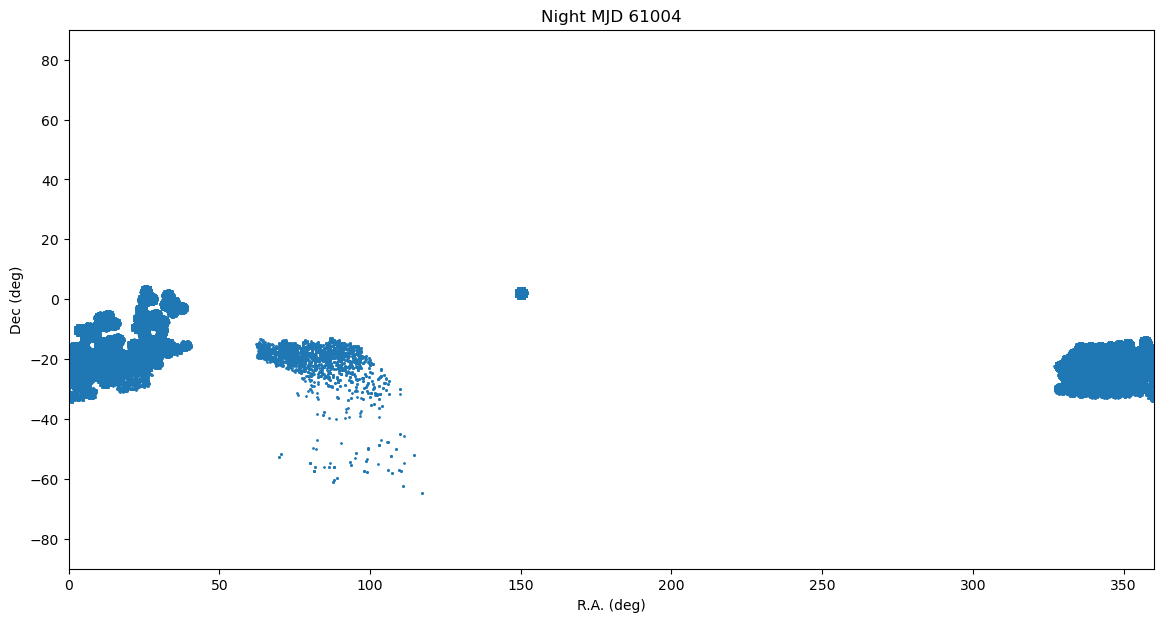

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))
plt.scatter(df["ra"], df["dec"], s=1)
plt.gca().invert_xaxis()
plt.xlabel("R.A. (deg)")
plt.ylabel("Dec (deg)")
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.title(f"Night MJD 61004");

Now let's find visits with many asteroids observed on them:

In [38]:
df.groupby("ccdVisitId").count().sort_values("ssObjectId", ascending=False)

,ssObjectId,ra,dec,midpointMjdTai
ccdVisitId,,,,
439434,1800,1800,1800,1800
439484,1528,1528,1528,1528
439436,1524,1524,1524,1524
439433,1469,1469,1469,1469
439438,1379,1379,1379,1379
...,...,...,...,...
439880,1,1,1,1
439939,1,1,1,1
439887,1,1,1,1


### Inspecting a single visit

In [39]:
sql = """
    SELECT
        ssObjectId, ra, dec, ccdVisitId, midpointMjdTai
    FROM
        dp03_catalogs_10yr.DiaSource
    WHERE
        ccdVisitId = 439438
        and ssObjectId IS NOT NULL
"""
df = query(sql, service)

Text(0.5, 1.0, 'Visit 439438 (MJD 61004.05354)')

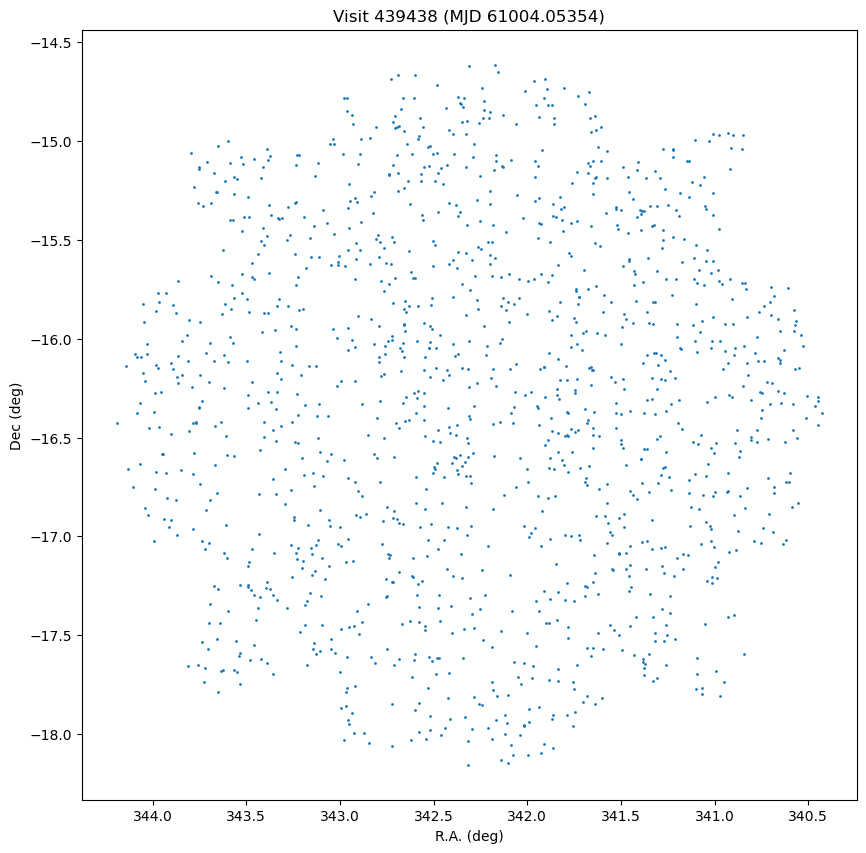

In [40]:
plt.figure(figsize=(10, 10))
plt.scatter(df["ra"], df["dec"], s=1)
plt.gca().invert_xaxis()
plt.xlabel("R.A. (deg)")
plt.ylabel("Dec (deg)")
plt.title(f"Visit {df['ccdVisitId'].iloc[0]} (MJD {df['midpointMjdTai'].iloc[0]:.5f})")

Now grab the same data in ecliptic coordinates. This will demonstrate how to join the DiaSource and SSSource tables:

In [42]:
%%time
sql = """
    SELECT
        eclipticLambda as lon, eclipticBeta as lat, ccdVisitId, midpointMjdTai
    FROM
        dp03_catalogs_10yr.DiaSource JOIN dp03_catalogs_10yr.SSSource
            ON dp03_catalogs_10yr.DiaSource.diaSourceId = dp03_catalogs_10yr.SSSource.diaSourceId
    WHERE
        ccdVisitId = 439438
"""
df = query(sql, service)

CPU times: user 32.2 ms, sys: 3.02 ms, total: 35.3 ms
Wall time: 633 ms


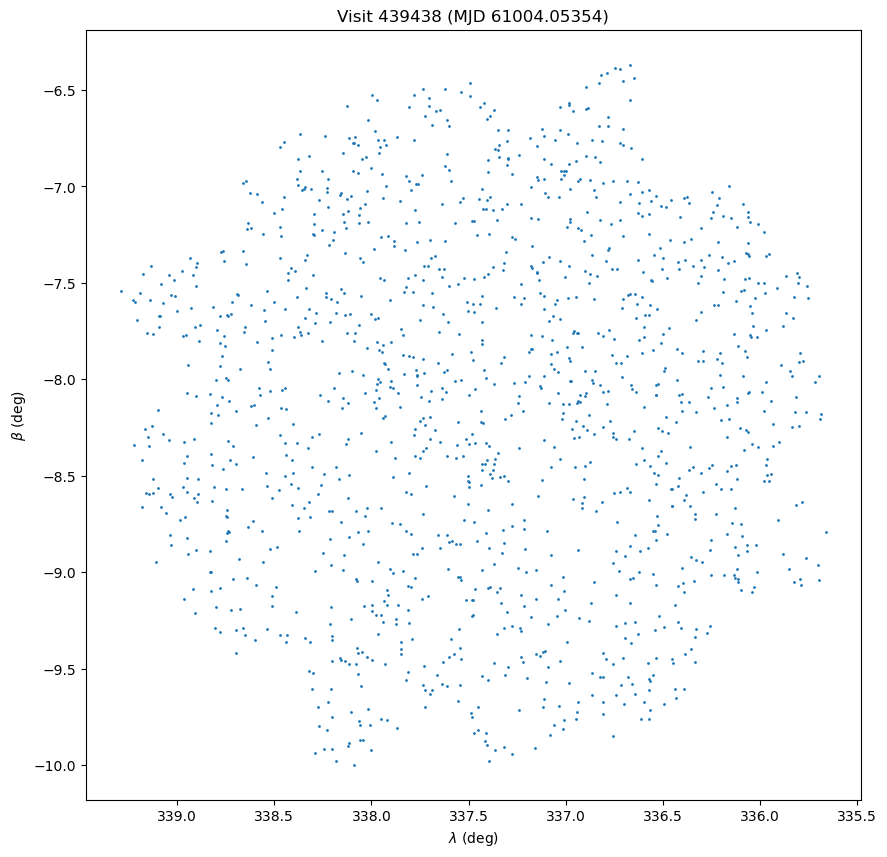

In [43]:
plt.figure(figsize=(10, 10))
plt.scatter(df["lon"], df["lat"], s=1)
plt.gca().invert_xaxis()
plt.xlabel(r"$\lambda$ (deg)")
plt.ylabel(r"$\beta$ (deg)")
plt.title(f"Visit {df['ccdVisitId'].iloc[0]} (MJD {df['midpointMjdTai'].iloc[0]:.5f})");

### First month of the survey

Let's first find out when this survey started:

In [44]:
t0 = query("SELECT MIN(midpointMjdTai) as min from dp03_catalogs_10yr.DiaSource", service)["min"].iloc[0]
t0

60218.00491

In [45]:
sql = """
    SELECT
        ra, dec
    FROM
        dp03_catalogs_10yr.diaSource
    WHERE
        midpointMjdTai BETWEEN {start:.0f} AND {end:.0f}
""".format(start=t0, end=t0+30)
df = query(sql)

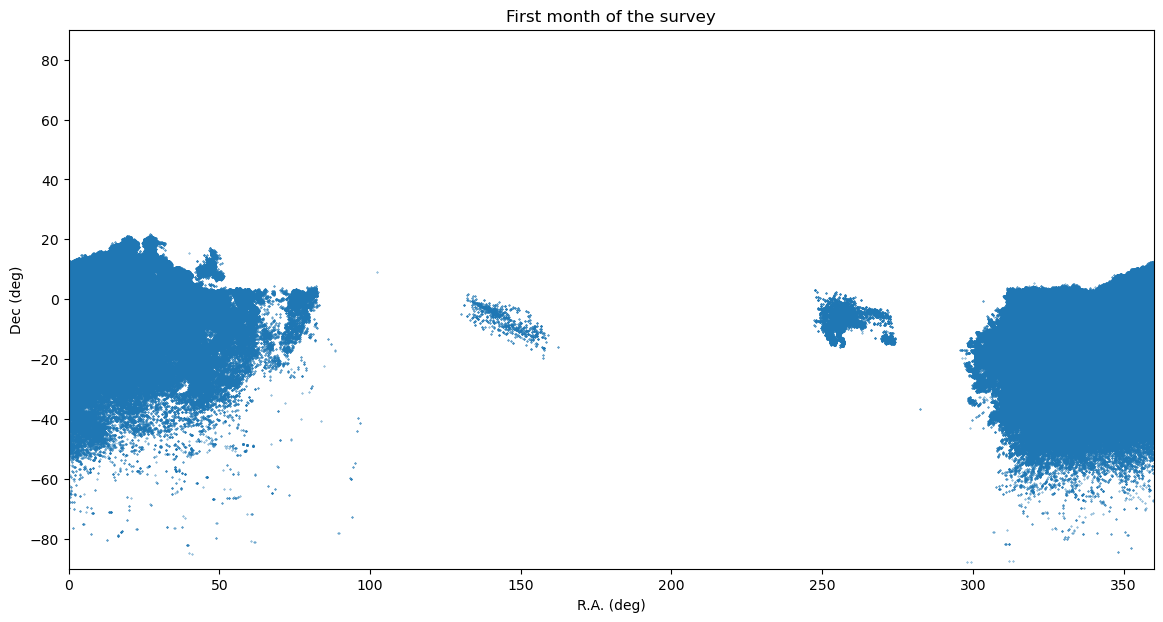

In [46]:
plt.figure(figsize=(14, 7))
plt.scatter(df["ra"], df["dec"], s=.1)
plt.gca().invert_xaxis()
plt.xlabel("R.A. (deg)")
plt.ylabel("Dec (deg)")
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.title(f"First month of the survey");

### Plot a phase curve

Now let's focus on obtaining and analyzing data of individual objects. In particular, let's find a good object to plot (and ultimately fit) a phase curve.

A good candidate object will have a) many observations and b) observations taken over a broad range of phase angles. Let's try to find an object like that.

In [48]:
sql = """
    SELECT
        mpcdesignation
    FROM
        dp03_catalogs_10yr.mpcorb
    LIMIT 5
"""
query(sql)

,mpcdesignation
0,1001 T-2
1,1002 T-2
2,1003 T-2
3,1004 T-2
4,1004 T-3


In [62]:
sql = """
    SELECT
        dp03_catalogs_10yr.DiaSource.ssObjectId as ssoid, band,
        max(phaseAngle) - min(phaseAngle) AS phaseRange
    FROM
        dp03_catalogs_10yr.DiaSource
            JOIN dp03_catalogs_10yr.SSSource ON dp03_catalogs_10yr.DiaSource.diaSourceId = dp03_catalogs_10yr.SSSource.diaSourceId
    GROUP BY
        ssoid, band
    ORDER BY
        phaseRange DESC
    LIMIT 5
"""
query(sql)

,ssoid,band,phaseRange
0,2336491275747399059,z,127.91191
1,566420663537098320,r,125.86454
2,6248582637172853282,r,125.17463
3,8268570668335894776,r,124.23804
4,-7025520668476352989,r,122.96802


In [80]:
ssoId = 8268570668335894776
sql = f"""
    SELECT
        mpcdesignation
    FROM
        dp03_catalogs_10yr.mpcorb
    WHERE
        ssObjectId = {ssoId}
    LIMIT 5
"""
df = query(sql)
desig = df["mpcdesignation"].iloc[0]
print(f"Designation: {desig}")

Designation: 2014 QL4


In [82]:
sql = f"""
    SELECT
        ssObject.ssObjectId, mag, magErr, band, midpointMjdTai as mjd, ra, dec, phaseAngle,
        topocentricDist, heliocentricDist
    FROM
        dp03_catalogs_10yr.ssObject
        JOIN dp03_catalogs_10yr.diaSource ON dp03_catalogs_10yr.ssObject.ssObjectId   = dp03_catalogs_10yr.diaSource.ssObjectId
        JOIN dp03_catalogs_10yr.ssSource  ON dp03_catalogs_10yr.diaSource.diaSourceId = dp03_catalogs_10yr.ssSource.diaSourceId
    WHERE
        ssObject.ssObjectId = {ssoId} and band='r'
"""
df = query(sql)
# Distance correction
df["cmag"] = df["mag"] - 5*np.log10(df["topocentricDist"]*df["heliocentricDist"])
df.head()

,ssObjectId,mag,magErr,band,mjd,ra,dec,phaseAngle,topocentricDist,heliocentricDist,cmag
0,8268570668335894776,23.521999,0.163,r,61052.13729,62.676760,27.053537,18.636665,1.420081,2.218208,21.030422
1,8268570668335894776,23.933001,0.351,r,63554.05676,322.086079,-12.309079,31.884970,1.673502,1.863380,21.463362
2,8268570668335894776,23.742001,0.200,r,63562.05437,325.868688,-11.025605,30.160686,1.837403,1.937720,20.984524
3,8268570668335894776,22.440001,0.046,r,60230.03315,323.924226,-10.557152,27.637327,1.035835,1.792379,21.096399
4,8268570668335894776,22.179001,0.042,r,62415.05691,304.799329,-17.016993,37.814331,0.858472,1.528281,21.589355


Now make a plot:

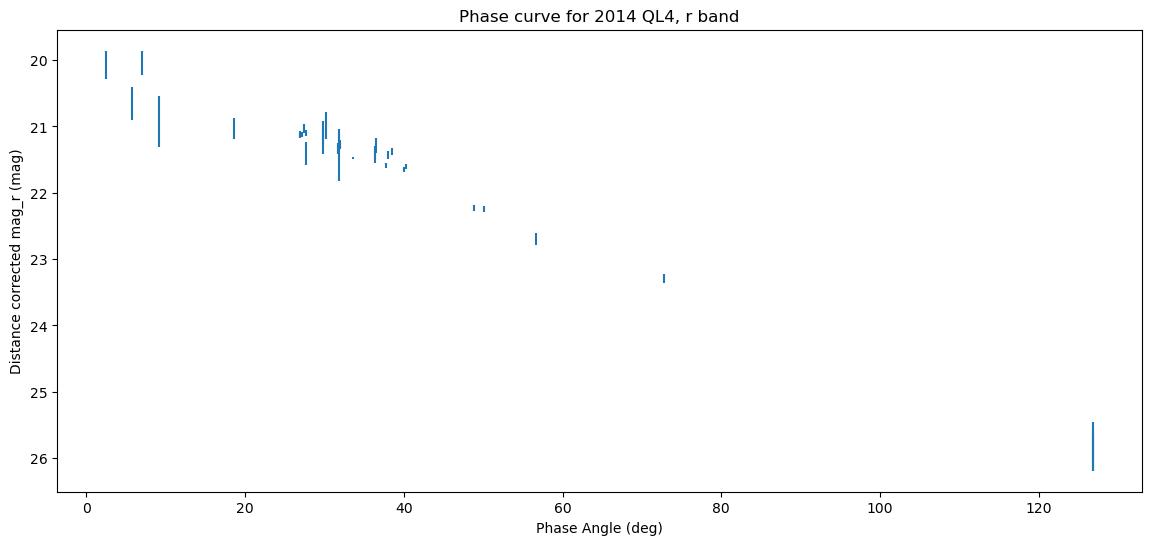

In [83]:
plt.figure(figsize=(14, 6))
plt.errorbar(df["phaseAngle"], df["cmag"], df["magErr"], ls='none')
plt.gca().invert_yaxis()
plt.xlabel("Phase Angle (deg)")
plt.ylabel("Distance corrected mag_r (mag)")
plt.title(f'Phase curve for {desig}, r band');

Now grab our (H, G12) fit, and overplot it

In [86]:
sql = f"""
    SELECT
        r_H, r_G12, r_HErr, r_G12Err, r_Chi2
    FROM
        dp03_catalogs_10yr.ssObject
    WHERE
        ssObjectId={ssoId}
"""
hg = query(sql)
hg

,r_H,r_G12,r_HErr,r_G12Err,r_Chi2
0,19.805893,1.529326,0.019743,0.050717,8.480854


ModuleNotFoundError: No module named 'sbpy'

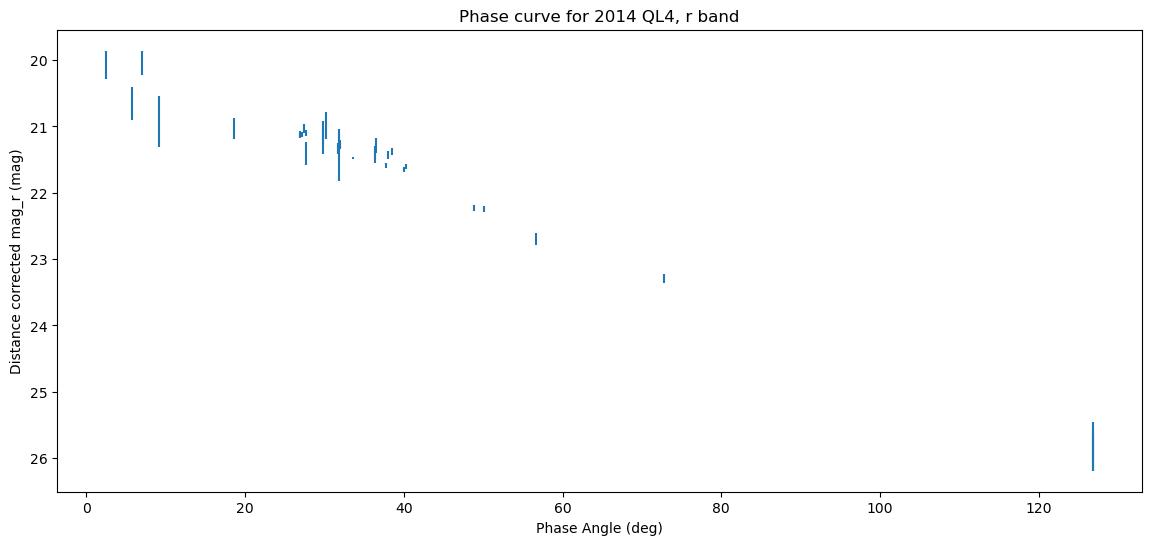

In [90]:
plt.figure(figsize=(14, 6))
plt.errorbar(df["phaseAngle"], df["cmag"], df["magErr"], ls='none')
plt.gca().invert_yaxis()
plt.xlabel("Phase Angle (deg)")
plt.ylabel("Distance corrected mag_r (mag)")
plt.title(f'Phase curve for {desig}, r band')

from sbpy.photometry import HG
H, G, sigmaH, sigmaG, chi2dof = hg.iloc[0]
_ph = sorted(df["phaseAngle"])
_mag = HG.evaluate(np.deg2rad(_ph), H, G)
plt.plot(_ph, _mag)
print(f"H={H:.2f}±{sigmaH:.3}, G={G:.2f}±{sigmaG:.3}, χ2/dof={chi2dof:.3f}")

## A Look at the input population

This largely S3M, so it should correspond to the plots from the Grav et al. 2011 paper.

Text(0, 0.5, 'Objects in bin')

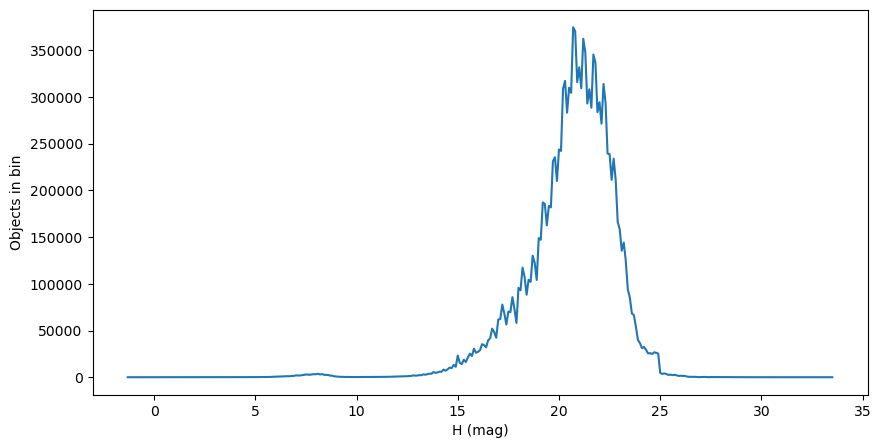

In [99]:
sql = """
    SELECT
        FLOOR(mpcH*10)/10 AS binH, count(*)
    FROM
        dp03_catalogs_10yr.mpcorb
    GROUP BY binH
"""
df = query(sql)
plt.figure(figsize=(10, 5))
plt.plot(df["binH"].astype(float), df["count"])
plt.xlabel("H (mag)")
plt.ylabel("Objects in bin")